<a href="https://colab.research.google.com/github/poiuyytee/CODSOFT/blob/main/CREDIT_CARD_FRAUD_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd

In [21]:
df_test =  pd.read_csv('/content/fraudTest.csv')
df_train =  pd.read_csv('/content/fraudTrain.csv')

In [22]:
print(len(df_train), len(df_test))

128241 128200


I'm goint to use both dataframes, test and train, into one, with union operation

In [23]:
df_complete = pd.concat([df_train, df_test])
len(df_complete)

256441

In [24]:
df_complete.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2.703186e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,6.304233e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,3.885949e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3.534094e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,3.755342e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


# Data Understanding and Exploration

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='is_fraud'>

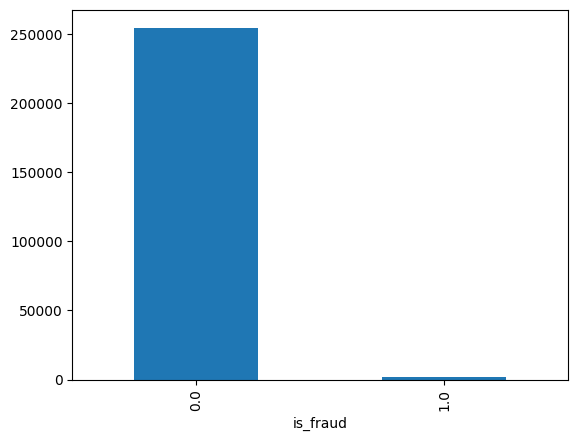

In [26]:
df_complete.groupby('is_fraud').count()['cc_num'].plot.bar()

We can see that, as usual, the number of fraudulent transactions is much smaller, which can lead our model to predict non fraudulent (0) with higher performance than fraud (1) transactions.

In [27]:
fraud = df_complete[df_complete['is_fraud'] == 1]
non_fraud = df_complete[df_complete['is_fraud'] == 0]

print(len(fraud), len(non_fraud))

1695 254744


In [28]:
df_complete.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,256441.000000,2.564400e+05,256440.000000,256439.000000,256439.000000,256439.000000,2.564390e+05,2.564390e+05,256439.000000,256439.000000,256439.000000
mean,64109.751639,4.162076e+17,70.428595,48782.043582,38.538165,-90.198438,8.908989e+04,1.351155e+09,38.538296,-90.199006,0.006610
std,37014.145102,1.307323e+18,150.937476,26873.532007,5.070114,13.733305,3.017351e+05,2.261454e+07,5.104950,13.746099,0.081031
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.029798,-166.671575,0.000000
25%,32055.000000,1.800429e+14,9.640000,26237.000000,34.668900,-96.798000,7.430000e+02,1.328630e+09,34.749878,-96.882335,0.000000
50%,64110.000000,3.519607e+15,47.620000,48174.000000,39.371600,-87.476900,2.456000e+03,1.331491e+09,39.373287,-87.421582,0.000000
75%,96165.000000,4.634956e+15,83.310000,72011.000000,41.894800,-80.158000,2.047800e+04,1.373722e+09,41.954465,-80.234773,0.000000
max,128240.000000,4.992346e+18,13149.150000,99783.000000,65.689900,-67.950300,2.906700e+06,1.375636e+09,66.669356,-66.952352,1.000000


In [29]:
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
Index: 256441 entries, 0 to 128199
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             256441 non-null  int64  
 1   trans_date_trans_time  256441 non-null  object 
 2   cc_num                 256440 non-null  float64
 3   merchant               256440 non-null  object 
 4   category               256440 non-null  object 
 5   amt                    256440 non-null  float64
 6   first                  256440 non-null  object 
 7   last                   256440 non-null  object 
 8   gender                 256440 non-null  object 
 9   street                 256439 non-null  object 
 10  city                   256439 non-null  object 
 11  state                  256439 non-null  object 
 12  zip                    256439 non-null  float64
 13  lat                    256439 non-null  float64
 14  long                   256439 non-null  f

Checking distinct

In [30]:
df_complete.nunique()

Unnamed: 0               128241
trans_date_trans_time    252412
cc_num                      926
merchant                    693
category                     14
amt                       28972
first                       343
last                        473
gender                        2
street                      926
city                        851
state                        50
zip                         914
lat                         912
long                        912
city_pop                    836
job                         480
dob                         912
trans_num                256439
unix_time                252442
merch_lat                254480
merch_long               255581
is_fraud                      2
dtype: int64

Checking for NaN/null and duplicated cells

In [31]:
df_complete.isna().sum().sum()

35

In [32]:
df_complete.duplicated().sum()

0

I'm not going to analyze outliers for they can be important to detect frauds.

<Axes: >

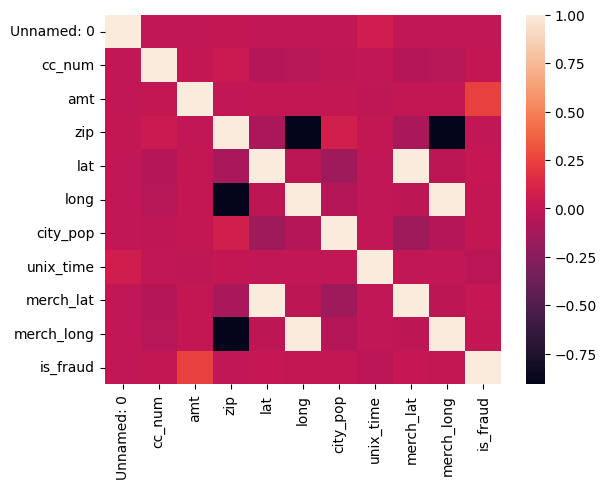

In [33]:
sns.heatmap(df_complete[[i for i in df_complete.columns\
                         if df_complete[i].dtype == 'int64' \
                            or df_complete[i].dtype == 'float64']]\
                            .corr())

This shows greater correlation of 'is_fraud' column with 'amt' variable

# Data Preparation

### Balancing the dataset

In [34]:
df_balanced = pd.concat([fraud, non_fraud.sample(len(fraud), random_state= 42)])

In [35]:
df_balanced.shape

(3390, 23)

<Axes: xlabel='is_fraud'>

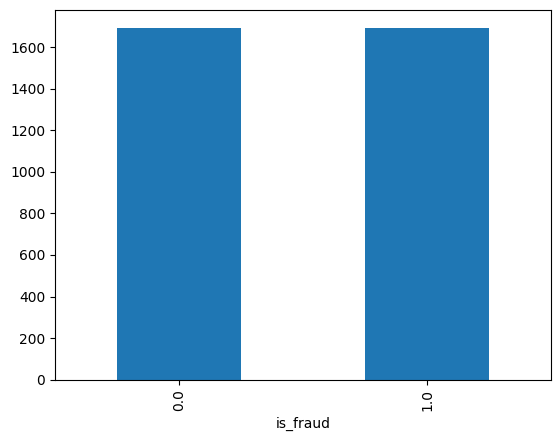

In [36]:
df_balanced.groupby('is_fraud').count()['cc_num'].plot.bar()

### Dropping columns

In [37]:
# Dropping columns not relevant for this case
columns_dropped = ['Unnamed: 0',
                   'merchant',
                   'cc_num',
                   'first',
                   'last',
                   'gender',
                   'trans_num',
                   'unix_time',
                   'street',
                   'merch_lat',
                   'merch_long',
                   'job',
                   'zip',
                   ]

df_balanced.drop(columns = columns_dropped, inplace = True)

In [38]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3390 entries, 2449 to 48631
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  3390 non-null   object 
 1   category               3390 non-null   object 
 2   amt                    3390 non-null   float64
 3   city                   3390 non-null   object 
 4   state                  3390 non-null   object 
 5   lat                    3390 non-null   float64
 6   long                   3390 non-null   float64
 7   city_pop               3390 non-null   float64
 8   dob                    3390 non-null   object 
 9   is_fraud               3390 non-null   float64
dtypes: float64(5), object(5)
memory usage: 291.3+ KB


### Feature Engineering: Managing datetimes

In [39]:
# First, I'm converting 'trans_date_trans_time' and 'dob' into datetime type
df_balanced['trans_date_trans_time'] = pd.to_datetime(df_balanced['trans_date_trans_time'])
df_balanced['dob'] = pd.to_datetime(df_balanced['dob'])

In [40]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3390 entries, 2449 to 48631
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  3390 non-null   datetime64[ns]
 1   category               3390 non-null   object        
 2   amt                    3390 non-null   float64       
 3   city                   3390 non-null   object        
 4   state                  3390 non-null   object        
 5   lat                    3390 non-null   float64       
 6   long                   3390 non-null   float64       
 7   city_pop               3390 non-null   float64       
 8   dob                    3390 non-null   datetime64[ns]
 9   is_fraud               3390 non-null   float64       
dtypes: datetime64[ns](2), float64(5), object(3)
memory usage: 291.3+ KB


In [41]:
# Now, we can use these datetime variables to extract relevant information
# about the transaction and the client, such as day hour and age

# Lets change these columns
df_balanced['trans_date_trans_time'] = df_balanced['trans_date_trans_time'].dt.hour

In [42]:
df_balanced = df_balanced.rename(columns = {'trans_date_trans_time': 'hour_transaction'})

In [43]:
# Function to get time of day
def get_tod(hour):
    if 4 < hour['hour_transaction'] <= 12:
        ans = 'morning'
    elif 12 < hour['hour_transaction'] <= 20:
        ans = 'afternoon'
    elif hour['hour_transaction'] <= 4 or hour['hour_transaction'] > 20:
        ans = 'night'
    return ans

In [44]:
df_balanced['hour_transaction'] = df_balanced.apply(get_tod, axis = 1)

In [45]:
df_balanced.head()

,hour_transaction,category,amt,city,state,lat,long,city_pop,dob,is_fraud
2449,night,grocery_pos,281.06,Collettsville,NC,35.9946,-81.7266,885.0,1988-09-15,1.0
2472,night,gas_transport,11.52,San Antonio,TX,29.4400,-98.4590,1595797.0,1960-10-28,1.0
2523,night,grocery_pos,276.31,San Antonio,TX,29.4400,-98.4590,1595797.0,1960-10-28,1.0
2546,night,gas_transport,7.03,Collettsville,NC,35.9946,-81.7266,885.0,1988-09-15,1.0
2553,night,grocery_pos,275.73,San Antonio,TX,29.4400,-98.4590,1595797.0,1960-10-28,1.0


In [46]:
# Now, about 'dob' (day of birth), we can get the age of the user
df_balanced['dob']= df_balanced['dob'].dt.year
df_balanced = df_balanced.rename(columns = {'dob': 'age'})

In [47]:
from datetime import datetime
df_balanced['age'] = datetime.now().year - df_balanced['age']

In [48]:
# Analyzing how many frauds occur for each age group
df_balanced[df_balanced['is_fraud'] == 1].groupby('age').count()['is_fraud']

age
23     32
24     10
25     23
26      9
27     45
       ..
92      7
93     11
95     10
99     11
100     6
Name: is_fraud, Length: 67, dtype: int64

In [49]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3390 entries, 2449 to 48631
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hour_transaction  3390 non-null   object 
 1   category          3390 non-null   object 
 2   amt               3390 non-null   float64
 3   city              3390 non-null   object 
 4   state             3390 non-null   object 
 5   lat               3390 non-null   float64
 6   long              3390 non-null   float64
 7   city_pop          3390 non-null   float64
 8   age               3390 non-null   int32  
 9   is_fraud          3390 non-null   float64
dtypes: float64(5), int32(1), object(4)
memory usage: 278.1+ KB


### Label Encoding

Using label encoding for categorical data

In [50]:
NUMERICAL_FEATURES = [i for i in df_balanced.columns if df_balanced[i].dtype == 'int64'\
                      or df_balanced[i].dtype =='int32' \
                      or df_balanced[i].dtype =='float64']
CATEGORICAL_FEATURES = [i for i in df_balanced.columns if df_balanced[i].dtype == 'object']

In [51]:
NUMERICAL_FEATURES

['amt', 'lat', 'long', 'city_pop', 'age', 'is_fraud']

In [52]:
CATEGORICAL_FEATURES

['hour_transaction', 'category', 'city', 'state']

In [53]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
encoder.fit(df_balanced[CATEGORICAL_FEATURES])

df_balanced[CATEGORICAL_FEATURES] = encoder.transform(df_balanced[CATEGORICAL_FEATURES])

In [54]:
df_balanced.head()

,hour_transaction,category,amt,city,state,lat,long,city_pop,age,is_fraud
2449,2.0,4.0,281.06,131.0,26.0,35.9946,-81.7266,885.0,36,1.0
2472,2.0,2.0,11.52,570.0,41.0,29.4400,-98.4590,1595797.0,64,1.0
2523,2.0,4.0,276.31,570.0,41.0,29.4400,-98.4590,1595797.0,64,1.0
2546,2.0,2.0,7.03,131.0,26.0,35.9946,-81.7266,885.0,36,1.0
2553,2.0,4.0,275.73,570.0,41.0,29.4400,-98.4590,1595797.0,64,1.0


### Correcting datatypes

In [55]:
df_balanced[['is_fraud', 'age']] = df_balanced[['is_fraud', 'age']].astype('float64')

### Scaling dataset

As I'm trying different models, such as SVM which relies on distance, I'll scale the dataset.

<Axes: >

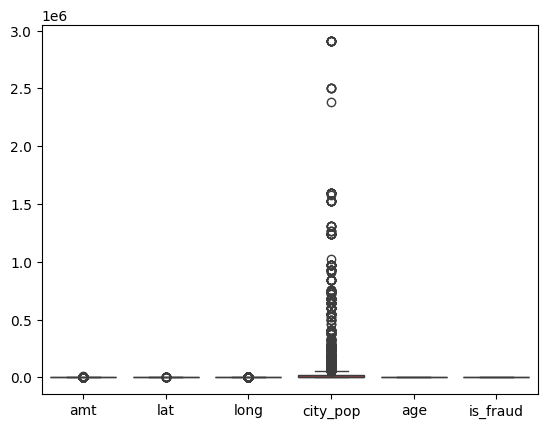

In [56]:
sns.boxplot(df_balanced[NUMERICAL_FEATURES])

<Axes: >

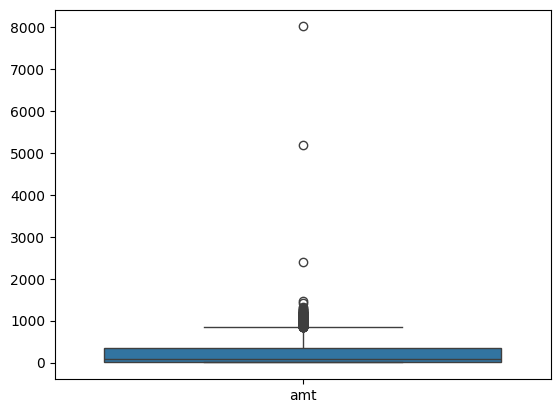

In [57]:
sns.boxplot(df_balanced[['amt']])

And not all of them seem to follow a gaussian normal distribution, so i'm using normal minmax scaler.

In [58]:
# Using min max scaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_balanced)
df_scaled = pd.DataFrame(df_scaled)

In [59]:
last_column = df_scaled.shape[1]-1

In [60]:
print(f"Not fraud: {df_scaled[df_scaled[last_column] == 0].count()[last_column]}")
print(f"Fraud: {df_scaled[df_scaled[last_column] == 1].count()[last_column]}")

Not fraud: 1695
Fraud: 1695


In [61]:
df_scaled.rename(columns={last_column: 'is_fraud'}, inplace=True)
df_scaled.head()

,0,1,2,3,4,5,6,7,8,is_fraud
0,1.0,0.307692,0.034916,0.185028,0.541667,0.349683,0.859026,0.000297,0.209877,1.0
1,1.0,0.153846,0.001310,0.805085,0.854167,0.206139,0.687801,0.549003,0.555556,1.0
2,1.0,0.307692,0.034324,0.805085,0.854167,0.206139,0.687801,0.549003,0.555556,1.0
3,1.0,0.153846,0.000751,0.185028,0.541667,0.349683,0.859026,0.000297,0.209877,1.0
4,1.0,0.307692,0.034252,0.805085,0.854167,0.206139,0.687801,0.549003,0.555556,1.0


# Modeling

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [63]:
# X = feature values, all the columns except the last column
X = df_scaled.drop(columns = 'is_fraud')

# y = target values, last column of the data frame
y = df_scaled['is_fraud']

In [64]:
# Spliting train and test - hold out
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model

In [65]:
# Training
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [66]:
# Now let's define a function to get the predictions and set the threshold

def predict(model, test_set, threshold):
    predictions = model.predict(test_set)
    pred_threshold = model.predict_proba(test_set)
    test_set["prediction"] = predictions
    test_set["pred_threshold"] = (pred_threshold >= threshold)[:, 1].astype(float)
    return test_set

In [67]:
# Use 0.4 as threshold for LR model
predict(model, x_test, 0.4)

,0,1,2,3,4,5,6,7,8,prediction,pred_threshold
134,1.0,0.846154,0.096712,0.176554,0.770833,0.470698,0.876108,0.001887,0.395062,1.0,1.0
1764,0.5,0.153846,0.007713,0.538136,0.770833,0.444756,0.880166,0.000499,0.790123,0.0,0.0
2465,0.0,0.461538,0.006381,0.933616,0.708333,0.465079,0.868340,0.026105,0.592593,0.0,0.0
1987,0.0,0.384615,0.009305,0.816384,0.770833,0.444160,0.914594,0.000275,0.283951,0.0,0.0
1295,1.0,0.692308,0.000888,0.354520,0.541667,0.331922,0.861803,0.001926,0.395062,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1052,1.0,0.307692,0.043106,0.112994,0.687500,0.485445,0.910094,0.000171,0.172840,1.0,1.0
759,1.0,0.153846,0.001086,0.008475,0.645833,0.329130,0.604999,0.220639,0.469136,1.0,1.0
2069,0.0,0.538462,0.020042,0.751412,0.458333,0.625805,0.740617,0.000039,0.061728,0.0,0.0
3166,1.0,0.153846,0.006138,0.015537,0.687500,0.482813,0.896552,0.000074,0.604938,1.0,1.0


The 'prediction' column is for standard threshold (0.5) and the 'pred_threshold' stands for our results with the changed threshold.

In [68]:
y_test = pd.DataFrame(y_test)

In [69]:
x_test["real"] = y_test["is_fraud"]

In [70]:
x_test.head(5)

,0,1,2,3,4,5,6,7,8,prediction,pred_threshold,real
134,1.0,0.846154,0.096712,0.176554,0.770833,0.470698,0.876108,0.001887,0.395062,1.0,1.0,1.0
1764,0.5,0.153846,0.007713,0.538136,0.770833,0.444756,0.880166,0.000499,0.790123,0.0,0.0,0.0
2465,0.0,0.461538,0.006381,0.933616,0.708333,0.465079,0.868340,0.026105,0.592593,0.0,0.0,0.0
1987,0.0,0.384615,0.009305,0.816384,0.770833,0.444160,0.914594,0.000275,0.283951,0.0,0.0,0.0
1295,1.0,0.692308,0.000888,0.354520,0.541667,0.331922,0.861803,0.001926,0.395062,1.0,1.0,1.0


In [71]:
# With 0.5 threshold
print(classification_report(x_test['real'], x_test['prediction']))

              precision    recall  f1-score   support

         0.0       0.83      0.73      0.78       318
         1.0       0.79      0.86      0.82       360

    accuracy                           0.80       678
   macro avg       0.81      0.80      0.80       678
weighted avg       0.80      0.80      0.80       678



In [72]:
# With 0.4 threshold
print(classification_report(x_test['real'], x_test['pred_threshold']))

              precision    recall  f1-score   support

         0.0       0.83      0.73      0.78       318
         1.0       0.78      0.87      0.82       360

    accuracy                           0.80       678
   macro avg       0.81      0.80      0.80       678
weighted avg       0.81      0.80      0.80       678



We can see an improvement in the recall for frauds, which is now 0.94, but also some other metrics such as precision got a little bit worse.

The F1-score overall got better!

In [73]:
# Let's define now a function to get the confusion matrix
def confusion_matrix_plot(test_set, pred_label, model):
    cm = confusion_matrix(x_test['real'], x_test[pred_label], labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
    disp.plot()
    plt.show()

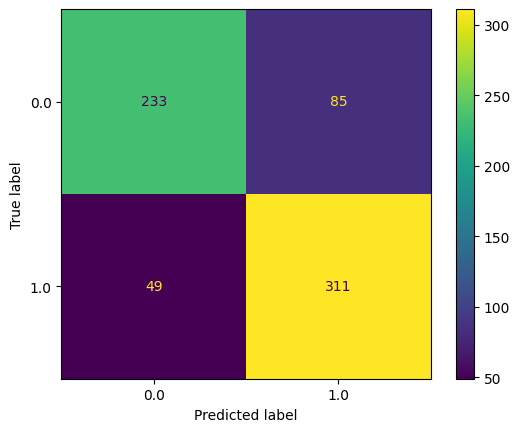

In [74]:
confusion_matrix_plot(x_test, 'prediction', model)

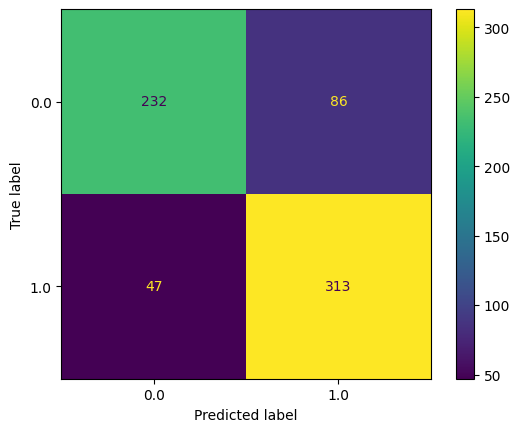

In [75]:
confusion_matrix_plot(x_test, 'pred_threshold', model)

This way, we got way better at predicting fraud transactions, but worse to predict non fraud.

# SVM Classifier Model

Let's try now with SVC model

In [76]:
from sklearn.svm import SVC

In [77]:
model_SVM = SVC(probability = True, random_state=42)

In [78]:
model_SVM.fit(x_train, y_train)

SVC(probability=True, random_state=42)

In [79]:
# Dropping our last predictions
x_test = x_test.drop(columns = {'prediction','pred_threshold' ,'real'})

In [80]:
# Use 0.4 as threshold for LR model
predict(model_SVM, x_test, 0.4)

,0,1,2,3,4,5,6,7,8,prediction,pred_threshold
134,1.0,0.846154,0.096712,0.176554,0.770833,0.470698,0.876108,0.001887,0.395062,1.0,1.0
1764,0.5,0.153846,0.007713,0.538136,0.770833,0.444756,0.880166,0.000499,0.790123,0.0,0.0
2465,0.0,0.461538,0.006381,0.933616,0.708333,0.465079,0.868340,0.026105,0.592593,0.0,0.0
1987,0.0,0.384615,0.009305,0.816384,0.770833,0.444160,0.914594,0.000275,0.283951,0.0,0.0
1295,1.0,0.692308,0.000888,0.354520,0.541667,0.331922,0.861803,0.001926,0.395062,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1052,1.0,0.307692,0.043106,0.112994,0.687500,0.485445,0.910094,0.000171,0.172840,1.0,1.0
759,1.0,0.153846,0.001086,0.008475,0.645833,0.329130,0.604999,0.220639,0.469136,1.0,1.0
2069,0.0,0.538462,0.020042,0.751412,0.458333,0.625805,0.740617,0.000039,0.061728,0.0,0.0
3166,1.0,0.153846,0.006138,0.015537,0.687500,0.482813,0.896552,0.000074,0.604938,1.0,1.0


In [81]:
x_test["real"] = y_test["is_fraud"]

# With 0.5 threshold
print(classification_report(x_test['real'], x_test['prediction']))
# With 0.4 threshold
print(classification_report(x_test['real'], x_test['pred_threshold']))

              precision    recall  f1-score   support

         0.0       0.85      0.75      0.80       318
         1.0       0.80      0.88      0.84       360

    accuracy                           0.82       678
   macro avg       0.83      0.82      0.82       678
weighted avg       0.82      0.82      0.82       678

              precision    recall  f1-score   support

         0.0       0.85      0.75      0.80       318
         1.0       0.80      0.88      0.84       360

    accuracy                           0.82       678
   macro avg       0.83      0.82      0.82       678
weighted avg       0.82      0.82      0.82       678



In this case, we've got more balanced metrics, and a little improvement in recall. The f1-score is somewhat similar to LR.

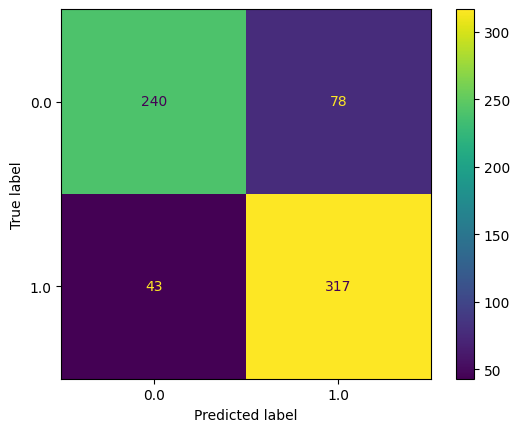

In [82]:
confusion_matrix_plot(x_test, 'pred_threshold', model_SVM)

# XGBoost Model

Finally, I will implement XGBoost model and compare with LR and SVC.

In [83]:
from xgboost import XGBClassifier

In [84]:
# XGBoost classifier model
xgb = XGBClassifier(objective='binary:logistic')

In [85]:
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [86]:
# Drop again our last predictions
x_test = x_test.drop(columns = {'prediction','pred_threshold' ,'real'})

In [87]:
# Experimenting 0.3 threshold for XGBoost model
predict(xgb, x_test, 0.3)

,0,1,2,3,4,5,6,7,8,prediction,pred_threshold
134,1.0,0.846154,0.096712,0.176554,0.770833,0.470698,0.876108,0.001887,0.395062,1,1.0
1764,0.5,0.153846,0.007713,0.538136,0.770833,0.444756,0.880166,0.000499,0.790123,0,0.0
2465,0.0,0.461538,0.006381,0.933616,0.708333,0.465079,0.868340,0.026105,0.592593,0,0.0
1987,0.0,0.384615,0.009305,0.816384,0.770833,0.444160,0.914594,0.000275,0.283951,0,0.0
1295,1.0,0.692308,0.000888,0.354520,0.541667,0.331922,0.861803,0.001926,0.395062,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1052,1.0,0.307692,0.043106,0.112994,0.687500,0.485445,0.910094,0.000171,0.172840,1,1.0
759,1.0,0.153846,0.001086,0.008475,0.645833,0.329130,0.604999,0.220639,0.469136,1,1.0
2069,0.0,0.538462,0.020042,0.751412,0.458333,0.625805,0.740617,0.000039,0.061728,0,0.0
3166,1.0,0.153846,0.006138,0.015537,0.687500,0.482813,0.896552,0.000074,0.604938,0,0.0


In [88]:
x_test["real"] = y_test["is_fraud"]
print(classification_report(x_test['real'], x_test['prediction']))
print(classification_report(x_test['real'], x_test['pred_threshold']))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       318
         1.0       0.99      0.96      0.97       360

    accuracy                           0.97       678
   macro avg       0.97      0.97      0.97       678
weighted avg       0.97      0.97      0.97       678

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96       318
         1.0       0.97      0.96      0.97       360

    accuracy                           0.97       678
   macro avg       0.97      0.97      0.97       678
weighted avg       0.97      0.97      0.97       678



XGBoost got overall some much better results than the previous models, and we see also that in this case, reducing threshold to 0.3 got to a little bit worse model, which means that there is a different ROC (Receiver Operating Curve) behavior to this model

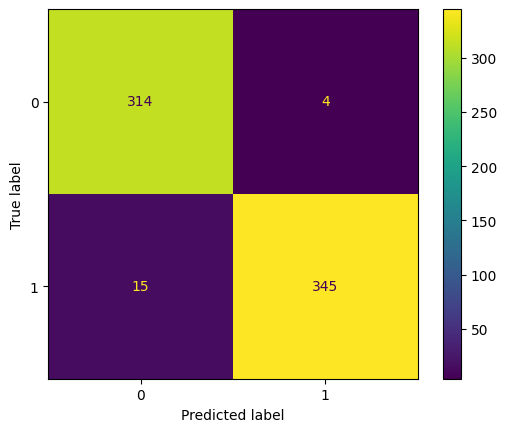

In [89]:
confusion_matrix_plot(x_test, 'prediction', xgb)